# Day 2: Regional variation in Twitter data

This exercise explores a dataset targeting regional lexical variation across three Canadian cities: Montreal, Toronto, and Vancouver. The data was originally used to examine semantic variation in Quebec English arising from contact with French. Out of the three cities, French is widely spoken only in Montreal, so the Toronto and Vancouver subcorpora represent "control" datasets from this perspective.

The main dataset (~20,000 words) is derived from a corpus of Canadian English tweets, presented in Miletić et al. (2020) [1]. We also use information on a small subset of 40 target words, which were subsequently included in sociolinguistic interviews with speakers from Montreal; the information derived from that setting is presented in Miletić et al. (2023) [2].

We use a variety of quantitative indicators which may be informative regarding differences in the use of a given word across regions:
* frequency in the Twitter corpus (log-normalized)
* frequency in a generic French corpus, to capture any effect of language contact (log-normalized)
* SAGE scores of regional specificity, i.e. how overrepresented/underrepresented an item is in one region compared to the others
* semantic estimates derived from vector representations of word meaning, based on measuring the cosine distance between a given word's vector in two subcorpora
  * `avg`: average of cos-dist(Montreal, Toronto) and cos-dist(Montreal, Vancouver), in order to target semantic variation which is specific to Montreal and therefore potentially related to language contact with French
  * `diff`: subtracting cos-dist(Toronto, Vancouver) from `avg`, as a way of controling for semantic variation which is not related to language contact

[1] https://aclanthology.org/2020.lrec-1.767/ <br>
[2] https://aclanthology.org/2023.emnlp-main.572/

## Content
1. Explore corpus-derived estimates on the full dataset (20k words)
  * Load the dataset
  * Calculate and observe correlations between different estimates
  * Explore words with highest/lowest values of different estimates
2. Compare human vs. corpus-derived estimates on a carefully selected set of target words
  * Load the small-scale dataset (40 words)
  * Calculate and observe correlations
  * Produce and inspect regression plots


# Explore the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [ ]:
# Download & load the data
!gdown --fuzzy https://drive.google.com/file/d/1JZHVNlcifgxmcQbR-s4zI0Jnbo5eHBmH/view?usp=sharing
df = pd.read_pickle("/content/quebec_words_esslli.pkl")

Downloading...
From: https://drive.google.com/uc?id=1JZHVNlcifgxmcQbR-s4zI0Jnbo5eHBmH
To: /content/quebec_words_esslli.pkl
100% 2.87M/2.87M [00:00<00:00, 61.2MB/s]


In [ ]:
# Define columns to be retained
target_cols = [
    'freq_m',  # frequency in Montreal
    'freq_t',  # frequency in Toronto
    'freq_v',  # frequency in Vancouver
    'sage_m',  # SAGE score for Montreal
    'sage_v',  # SAGE score for Vancouver
    'sage_t',  # SAGE score for Toronto
    'french',  # Frequency in a French corpus
    'avg',     # Semantic variation estimate: (cos(M,T) + cos(M,V))/2
    'diff'     # Semantic variation estimate: avg-cos(T,V)
]

In [ ]:
# Prepare the data
df = df.set_index('word')[target_cols]

In [ ]:
# Check out the data
df.head()

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
V_be,6.445741,6.443814,6.432552,0.029915,-0.018396,0.015364,4.227089,0.039452,-0.003030
V_have,5.852017,5.857970,5.857507,0.008914,0.003505,0.012539,3.585799,0.034367,0.005585
V_do,5.705566,5.695314,5.678537,0.047251,-0.032890,0.013498,4.253265,0.045094,-0.012650
V_get,5.633720,5.639084,5.622334,0.022477,-0.021582,0.024724,3.787885,0.061058,0.033466
R_not,5.607001,5.573641,5.555457,0.084353,-0.052215,-0.002282,4.007790,0.096751,0.016823


## Calculate and explore correlations

Which quantitative estimates are correlated to one another?<br>
What does this imply in terms of the information they capture (redundant, complementary)?

In [ ]:
# Check the correlations
df.corr(method='spearman').round(3)

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
freq_m,1.000,0.963,0.952,0.121,-0.073,0.034,0.415,-0.811,-0.043
freq_t,0.963,1.000,0.972,-0.076,-0.004,0.194,0.381,-0.809,-0.008
freq_v,0.952,0.972,1.000,-0.114,0.152,0.052,0.401,-0.801,0.006
sage_m,0.121,-0.076,-0.114,1.000,-0.666,-0.375,0.076,-0.038,-0.165
sage_v,-0.073,-0.004,0.152,-0.666,1.000,-0.283,0.035,0.028,0.141
sage_t,0.034,0.194,0.052,-0.375,-0.283,1.000,-0.108,-0.102,0.027
french,0.415,0.381,0.401,0.076,0.035,-0.108,1.000,-0.200,0.026
avg,-0.811,-0.809,-0.801,-0.038,0.028,-0.102,-0.200,1.000,0.207
diff,-0.043,-0.008,0.006,-0.165,0.141,0.027,0.026,0.207,1.000


## Explore top/bottom words for each estimate
* Given the **same estimate**, how different is the information it captures for **different subcorpora** (e.g. frequency in Montreal vs. Toronto)?
* Given **different estimates**, how different is the information they capture for the **same subcorpus** (e.g. frequency vs. SAGE in Montreal)?
* Can you come up with any **intuitions** about why some words appear as top/bottom candidates?

In [ ]:
# Frequency for Montreal
df.sort_values('freq_m', ascending=False)[:10]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
V_be,6.445741,6.443814,6.432552,0.029915,-0.018396,0.015364,4.227089,0.039452,-0.003030
V_have,5.852017,5.857970,5.857507,0.008914,0.003505,0.012539,3.585799,0.034367,0.005585
V_do,5.705566,5.695314,5.678537,0.047251,-0.032890,0.013498,4.253265,0.045094,-0.012650
V_get,5.633720,5.639084,5.622334,0.022477,-0.021582,0.024724,3.787885,0.061058,0.033466
R_not,5.607001,5.573641,5.555457,0.084353,-0.052215,-0.002282,4.007790,0.096751,0.016823
R_just,5.540355,5.537961,5.517527,0.037604,-0.032840,0.021950,3.763353,0.036291,-0.014415
R_so,5.490927,5.483852,5.463030,0.045289,-0.036823,0.018835,4.161308,0.035008,0.008306
V_go,5.470417,5.468179,5.441185,0.042274,-0.042901,0.027000,4.503273,0.074836,0.018843
V_make,5.421718,5.416236,5.408708,0.032636,-0.015093,0.009784,3.527888,0.056133,-0.008834


In [ ]:
# TODO: Find the words with the highest frequency in Toronto and Vancouver

In [ ]:
# SAGE score for Montreal
df.sort_values('sage_m', ascending=False)[:10]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
V_drouin,3.255384,2.050593,1.820431,1.091538,-2.226542,-1.689913,2.816904,0.231323,0.011373
N_medias,2.761204,1.828745,1.757572,0.979141,-1.342153,-1.171149,3.728110,0.235616,0.055363
A_fkn,3.310197,2.536882,2.077752,0.967986,-1.885186,-0.820865,0.778151,0.138704,-0.003910
R_fkn,3.436234,2.663377,2.231118,0.964559,-1.826415,-0.823721,0.778151,0.094173,-0.035441
N_#quebec,2.836800,1.912725,1.911761,0.959895,-1.182024,-1.172289,0.000000,0.274802,0.018195
N_metro,3.633426,2.694441,2.729638,0.958994,-1.139102,-1.212323,3.667546,0.373625,0.024471
N_de,3.322027,2.494638,2.404409,0.932045,-1.196910,-0.981433,7.858566,0.451363,0.265814
N_rds,2.589569,1.665491,1.795063,0.923665,-0.913552,-1.204248,3.042576,0.453961,0.054175
N_mb,3.340680,2.497751,2.528544,0.908832,-0.977402,-1.040524,3.826981,0.517974,0.317606


In [ ]:
# SAGE score for Toronto
df.sort_values('sage_t', ascending=False)[:10]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
N_streetcar,2.040265,3.462011,2.189726,-2.294865,-1.969291,0.966218,1.113943,0.294613,0.091693
N_6ix,1.853808,2.801256,1.746759,-1.285941,-1.550395,0.878648,0.000000,0.220096,0.015348
N_#raptors,1.904261,2.953683,2.055027,-1.535647,-1.207356,0.865455,0.000000,0.221375,0.061124
N_bungalow,1.817733,2.708414,1.921632,-1.224376,-1.004030,0.808392,3.262214,0.301233,0.037893
N_raptor,2.819440,3.537732,2.711814,-0.865182,-1.131065,0.777530,2.988559,0.103248,-0.032356
A_amped,1.759252,2.620669,1.926484,-1.190639,-0.824546,0.773236,1.041393,0.194580,0.007374
N_jay,2.556539,3.317765,2.660662,-1.002669,-0.781035,0.738208,3.474216,0.153660,-0.037267
A_somali,2.023560,2.668432,1.906740,-0.730056,-1.017870,0.736429,2.198657,0.271456,0.037965
N_subway,3.183310,3.795824,3.057889,-0.679883,-0.986724,0.719766,2.723456,0.201846,-0.007807


In [ ]:
# SAGE score for Vancouver
df.sort_values('sage_v', ascending=False)[:10]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
N_mainland,1.817733,1.885650,2.929849,-1.607505,0.929298,-1.462353,1.544068,0.258509,-0.164925
N_b.c.,2.653449,2.878738,3.850505,-1.811795,0.925812,-1.303388,2.267172,0.115018,0.029133
N_pst,2.438205,2.360224,3.459380,-1.406432,0.925343,-1.596251,2.968950,0.128177,0.004126
N_cove,1.774627,1.709558,2.782138,-1.376361,0.917867,-1.536987,2.328380,0.271545,-0.081365
R_bc,2.912586,2.962071,3.958184,-1.478528,0.910585,-1.374792,3.877256,0.175596,-0.020163
N_tanker,2.092327,2.008679,2.928890,-1.051186,0.852251,-1.254424,2.468347,0.148859,-0.043618
N_ferry,2.360333,2.524226,3.289887,-1.289796,0.830464,-0.922908,3.971647,0.173025,-0.013104
N_renter,1.951975,2.462886,3.039685,-1.701399,0.780890,-0.535913,2.296665,0.205208,0.071208
V_launder,2.304994,2.474822,3.143822,-1.132928,0.777749,-0.752356,0.000000,0.136951,-0.050484


In [ ]:
# TODO: Find the words with the lowest SAGE score in Montreal, Toronto, and Vancouver

In [ ]:
# French frequency
df.sort_values('french', ascending=False)[:10]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
N_de,3.322027,2.494638,2.404409,0.932045,-1.196910,-0.981433,7.858566,0.451363,0.265814
N_et,3.654745,3.254062,3.064611,0.643539,-0.732527,-0.288141,7.489914,0.297142,0.147061
N_le,2.990391,2.490873,2.538679,0.635309,-0.418646,-0.521350,7.463034,0.388098,0.237017
R_en,3.050989,2.232437,2.225095,0.905424,-1.010806,-0.986217,7.278071,0.528168,0.319092
N_est,3.691699,3.468497,2.934611,0.565895,-1.194680,0.038011,7.131307,0.251518,0.149201
V_pour,3.634105,3.292040,3.358384,0.452001,-0.199532,-0.344821,7.077387,0.343422,0.273651
N_pour,2.640786,1.919825,2.132110,0.751495,-0.427937,-0.911001,7.077387,0.677972,0.478919
V_par,1.747353,1.798781,1.746759,-0.000027,-0.000054,0.000112,6.959387,0.283953,-0.022341
A_par,1.923444,1.690080,1.708638,0.327105,-0.000198,-0.134908,6.959387,0.360137,0.148054


In [ ]:
# Top semantic variation candidates using `avg`
df.sort_values('avg', ascending=False)[:10]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
N_nt,1.739235,1.993098,1.798317,-0.225551,-0.000215,0.291566,4.169145,0.730712,0.424417
N_pour,2.640786,1.919825,2.132110,0.751495,-0.427937,-0.911001,7.077387,0.677972,0.478919
N_chum,2.351419,2.084017,2.079452,0.398751,-0.222041,-0.203168,2.540329,0.660999,0.111177
N_plateau,2.758077,1.966521,2.116816,0.833926,-0.653849,-0.992670,4.629073,0.644264,0.447259
V_ca,2.164178,1.814021,2.053229,0.325178,0.000146,-0.465379,5.406395,0.611190,0.163088
N_vag,2.159534,1.677959,2.136595,0.300052,0.226054,-0.794787,2.307496,0.595322,0.020991
V_ont,2.309426,2.194233,1.735670,0.414048,-0.908892,0.120792,6.316802,0.572624,0.323848
N_gorge,1.997231,1.997046,2.099347,-0.000134,0.117592,-0.000180,4.050534,0.570235,0.249067
N_vers,2.246684,1.682037,1.684049,0.714508,-0.577525,-0.575140,5.807350,0.563311,0.273732


In [ ]:
# Explore if there are more meaningful results down the list
df.sort_values('diff', ascending=False)[50:60]

,freq_m,freq_t,freq_v,sage_m,sage_v,sage_t,french,avg,diff
word,,,,,,,,,
V_outlast,2.356394,2.079165,2.067411,0.415727,-0.245771,-0.209461,1.431364,0.365605,0.176675
N_cpa,1.918049,2.098258,1.893928,-0.000228,-0.172111,0.257586,3.445137,0.359840,0.176487
N_cp,2.099536,1.978989,1.904208,0.234596,-0.183841,-0.000077,4.378271,0.548508,0.175213
N_pitchfork,1.901450,1.834497,1.954513,0.000037,0.000232,-0.000227,1.477121,0.363650,0.174368
V_commence,2.574866,2.579510,2.691987,-0.063453,0.160738,-0.066884,5.032046,0.300384,0.173808
N_amt,1.863149,1.742559,1.795063,0.060515,-0.000015,-0.000163,2.514548,0.376593,0.173040
N_spectacle,2.719539,2.462886,2.525518,0.343817,-0.104703,-0.248164,5.005447,0.299571,0.172546
N_prix,2.546438,2.062587,1.978708,0.679524,-0.635522,-0.433502,5.750949,0.323419,0.170721
N_dodo,2.099536,1.792533,1.791786,0.441990,-0.244251,-0.235116,3.570893,0.378066,0.170588


In [ ]:
# TODO: Repeat exploration of semantic candidates for `diff`.
# Are there any differences with respect to the information captured by `avg`?

# Compare computational scores vs. human accpetability ratings

## Load the dataset

In [ ]:
# Download the data
!gdown --fuzzy https://drive.google.com/file/d/13PozLyUiKUy3LLn8RhcATYkNLNVyAA8e/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=13PozLyUiKUy3LLn8RhcATYkNLNVyAA8e
To: /content/shifts_stats.tsv
100% 11.9k/11.9k [00:00<00:00, 21.2MB/s]


In [ ]:
# Load the data
df_socio = pd.read_csv('/content/shifts_stats.tsv', sep='\t')

In [ ]:
# Define the columns to retain
target_cols = ['human_avg',   # average human acceptability from 1 to 6
                              # (higher = more acceptable)
               'cos_avg',     # same as `avg` above
               'clust_cont',  # coarse annotation estimate;
                              # higher = more contact-related
               'clust_reg',   # coarse annotation estimate;
                              # higher = more regionally specific
               'freq',        # same as `freq_m` above
               'specif',      # same as `sage_m` above
               'polys'        # number of sense for the target word in WordNet
               ]

In [ ]:
# Prepare the data
df_socio = df_socio.set_index('word')[target_cols]

## Explore correlations
Explore the relationship between the quantitative estimates for this, much smaller, set of target words.<br>
Focus on human ratings (`human_avg`) and annotation estimates (`clust_cont`, `clust_reg`), looking how they in particular correlate with other properties.

In [ ]:
# TODO: Produce a correlation matrix (for Spearman's correlation coefficient)

## Produce regression plots

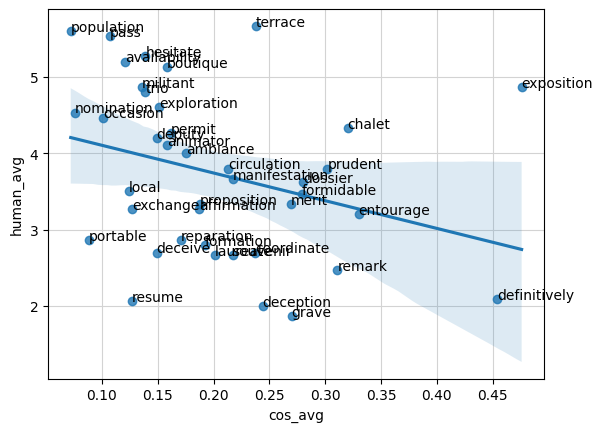

In [ ]:
# Regression plot comparing human acceptability ratings vs. semantic change estimate (`avg`)

# Define variables for X and Y axis
x_var = 'cos_avg'
y_var = 'human_avg'

# Set up the plot
fig, ax = plt.subplots()

# Get the regression plot
sns.regplot(data=df_socio,
            x=x_var,
            y=y_var)

# Plot labels for individual points
labels = df_socio[[x_var, y_var]].to_dict(orient='index')
for label in labels:
  x = labels[label][x_var]
  y = labels[label][y_var]
  plt.text(x, y, label)

# Formatting
ax.grid('both', c='lightgray')
ax.set_axisbelow(True)
plt.show()

In [ ]:
# TODO: Regression plot comparing human acceptability ratings vs. cluster-based estimate (`clust_cont`)